In [1]:
import os
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pydicom.pixel_data_handlers.util import apply_voi_lut
import pandas as pd

In [43]:

raw_path = '/Users/julio/Documentos-Local/data/DrVinn-Mammo/raw'
image_id = '71b862ab0072c6ced66f41253169abd0' # Seleccionar imágen a revisar
cmap = 'gray'
#cmap = None

path = os.path.join(raw_path, image_id+ '.dicom')
dicom = pydicom.dcmread('/Users/julio/Documentos-Local/data/VinDr-Mammo/images/0cc015fba720993209f0b8843ff98699/71b862ab0072c6ced66f41253169abd0.dicom')

In [44]:
findings = pd.read_csv('/Users/julio/Documentos-Local/data/VinDr-Mammo/finding_annotations.csv')

row = findings.loc[(findings['image_id'] == image_id) & (findings['finding_categories'] == "['Mass']")]
row.reset_index(inplace=True, drop=True)

In [45]:
row

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split


No findings


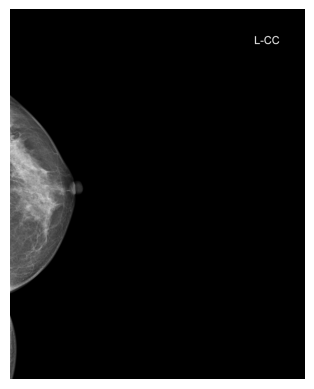

In [46]:
arr = apply_voi_lut(dicom.pixel_array, dicom)
plt.imshow(arr, cmap=cmap)
# Obtener el eje actual
ax = plt.gca()

colors = ["red", "blue", "green"]

if len(row) == 0:
    print("No findings")

for index, item in row.iterrows():
    print(f"{index+1} - {colors[index]} - finding_categories: {row.loc[index]['finding_categories']}, finding_birads: {row.loc[index]['finding_birads']}")
    # Coordenadas del punto superior izquierdo (x1, y1) y punto inferior derecho (x2, y2)
    x1, y1 = row['xmin'].values[index], row['ymin'].values[index]
    x2, y2 = row['xmax'].values[index], row['ymax'].values[index]
    
    # Calcular el ancho y alto del rectángulo
    width = x2 - x1
    height = y2 - y1
    
    # Dibujar el rectángulo sobre la imagen
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=colors[index], facecolor='none')
    ax.add_patch(rect)

# Mostrar la imagen con el rectángulo
plt.axis('off')
plt.show()

(np.float64(-0.5), np.float64(2799.5), np.float64(3517.5), np.float64(-0.5))

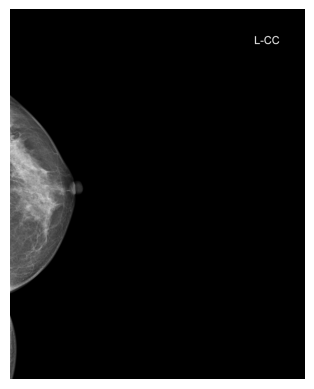

In [47]:
arr = apply_voi_lut(dicom.pixel_array, dicom)
plt.imshow(arr, cmap=cmap)
plt.axis('off')